<a href="https://colab.research.google.com/github/Bloodflake/Millennial-Cities-Ranking-Recommendation-Tutorial/blob/master/Millennial_Cities_Ranking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# #Importing libraries

In [0]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import  LabelEncoder
from sklearn.metrics.pairwise import cosine_similarity

In [5]:
os.listdir()

['.config', 'city_ranking.csv', 'sample_data']

In [0]:
#@title Loading dataset
 data = pd.read_csv("city_ranking.csv")

# #Data Preprocessing

In [7]:
data.head()

,city,country,Employment Score,Startup Score,Tourism Score,Housing Score,Food Ranking,Transport Score,Health Rank,Internet Speed Score,University Score,Access to Contraceptive Score,Gender Equality Score,Immigration Tolerence,Personal Freedom and Choice,LGBT friendly Score,Nightlife Score,Beer Ranking,Festival Ranking,Total
0,Berlin,Germany,4.8,9.0,6.2,5.2,7.2,7.1,3.9,5.0,4.9,6.9,7.5,8.4,7.8,9.7,10.0,7.0,8.0,7.14
1,Montréal,Canada,6.0,8.1,5.7,6.4,5.1,3.6,7.4,5.1,5.8,8.6,7.0,9.9,8.1,9.6,8.8,5.1,9.0,7.10
2,London,United Kingdom,6.6,9.8,9.8,0.5,2.2,7.2,4.4,4.7,10.0,9.5,7.1,8.7,9.6,9.4,9.4,2.5,7.5,6.71
3,Amsterdam,Netherlands,7.6,8.3,8.7,0.6,1.7,5.7,6.9,4.5,5.0,7.9,5.5,8.5,10.0,9.9,8.6,4.8,9.7,6.63
4,Toronto,Canada,6.3,9.5,4.4,2.7,6.1,4.3,7.4,7.1,5.2,8.6,7.0,9.9,9.4,9.8,4.5,3.6,9.4,6.60


In [8]:
data.describe()

,Employment Score,Startup Score,Tourism Score,Housing Score,Food Ranking,Transport Score,Health Rank,Internet Speed Score,University Score,Access to Contraceptive Score,Gender Equality Score,Immigration Tolerence,Personal Freedom and Choice,LGBT friendly Score,Nightlife Score,Beer Ranking,Festival Ranking,Total
count,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000
mean,4.972727,4.994545,5.000000,5.000909,5.000909,4.304545,4.841818,4.992727,3.580000,7.210909,5.416364,7.236364,4.914545,5.000000,4.992727,5.067273,4.517273,5.125545
std,2.909646,2.931037,2.922705,2.922343,2.924101,2.232183,2.924850,2.925676,2.496706,1.982647,2.031429,2.408423,2.918302,2.922705,2.926585,2.926284,3.169026,0.780482
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.210000
25%,2.500000,2.525000,2.525000,2.525000,2.525000,2.700000,1.900000,2.525000,1.000000,6.900000,4.100000,6.600000,2.525000,2.525000,2.525000,2.425000,0.700000,4.695000
50%,5.000000,5.000000,5.000000,5.000000,5.000000,4.250000,4.400000,5.000000,3.500000,7.500000,5.250000,8.300000,5.000000,5.000000,5.000000,5.100000,4.400000,5.185000
75%,7.450000,7.475000,7.475000,7.475000,7.475000,6.000000,7.400000,7.475000,5.375000,8.400000,7.100000,8.700000,7.200000,7.475000,7.475000,7.475000,7.275000,5.632500
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,7.140000


In [9]:
data.isnull().sum()

city                             0
country                          0
Employment Score                 0
Startup Score                    0
Tourism Score                    0
Housing Score                    0
Food Ranking                     0
Transport Score                  0
Health Rank                      0
Internet Speed Score             0
University Score                 0
Access to Contraceptive Score    0
Gender Equality Score            0
Immigration Tolerence            0
Personal Freedom and Choice      0
LGBT friendly Score              0
Nightlife Score                  0
Beer Ranking                     0
Festival Ranking                 0
Total                            0
dtype: int64

In [10]:
data.dtypes

city                              object
country                           object
Employment Score                 float64
Startup Score                    float64
Tourism Score                    float64
Housing Score                    float64
Food Ranking                     float64
Transport Score                  float64
Health Rank                      float64
Internet Speed Score             float64
University Score                 float64
Access to Contraceptive Score    float64
Gender Equality Score            float64
Immigration Tolerence            float64
Personal Freedom and Choice      float64
LGBT friendly Score              float64
Nightlife Score                  float64
Beer Ranking                     float64
Festival Ranking                 float64
Total                            float64
dtype: object

In [0]:
data = data.drop_duplicates()

In [12]:
data["city"].unique()

array(['Berlin', 'Montréal', 'London', 'Amsterdam', 'Toronto',
       'Vancouver', 'Barcelona', 'New York City', 'Cologne', 'Manchester',
       'Hamburg', 'Bristol', 'San Francisco', 'Austin', 'Paris', 'Miami',
       'Munich', 'Lisbon', 'Glasgow', 'Madrid', 'Melbourne', 'Ottawa',
       'Birmingham', 'Sydney', 'Prague', 'Vienna', 'Québec City',
       'Auckland', 'Los Angeles', 'São Paulo', 'Frankfurt',
       'Buenos Aires', 'Mexico City', 'Portland', 'Chicago', 'Nantes',
       'Budapest', 'Copenhagen', 'Santiago de Chile', 'Bogotá',
       'Valencia', 'Bangkok', 'Dublin', 'Lyon', 'Philadelphia',
       'Helsinki', 'Antwerp', 'Porto', 'Beijing', 'Stockholm', 'Denver',
       'Toulouse', 'Kuala Lumpur', 'Medellín', 'Rio de Janeiro', 'Graz',
       'Hong Kong', 'Edinburgh', 'Guadalajara', 'Lille', 'Rotterdam',
       'Taipei', 'Coventry', 'Moscow', 'Seoul', 'Adelaide', 'Brussels',
       'Zurich', 'Boston', 'Oslo', 'Monterrey', 'Seattle', 'Brisbane',
       'Washington, D.C.', 'The H

In [13]:
data["country"].unique()

array(['Germany', 'Canada', 'United Kingdom', 'Netherlands', 'Spain',
       'USA', 'France', 'Portugal', 'Australia', 'Czech Republic',
       'Austria', 'New Zealand', 'Brazil', 'Argentina', 'Mexico',
       'Hungary', 'Denmark', 'Chile', 'Colombia', 'Thailand', 'Ireland',
       'Finland', 'Belgium', 'China', 'Sweden', 'Malaysia',
       'Hong Kong SAR', 'Taiwan', 'Russia', 'South Korea', 'Switzerland',
       'Norway', 'Israel', 'Japan', 'Poland', 'Singapore', 'Turkey',
       'Peru', 'Italy', 'Romania', 'Greece', 'South Africa'], dtype=object)

In [0]:
data_cleaned = data.copy()

In [0]:
le = LabelEncoder()
data_cleaned[["country"]] = data_cleaned[["country"]].apply(lambda col: le.fit_transform(col))
country = pd.DataFrame(index=le.fit_transform( np.array(data["country"])) , data = np.array(data["country"]))
data_cleaned = data_cleaned.pivot_table(columns=["city"],values=data_cleaned.columns)
data_cleaned.head()

# #Analysis

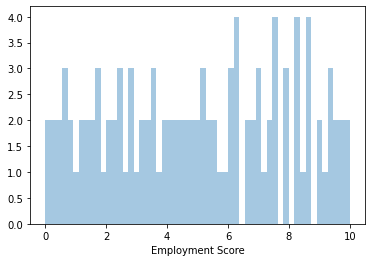

In [135]:
#@title Employment Score Distribution
sns.distplot(data["Employment Score"], bins=55, kde=False)

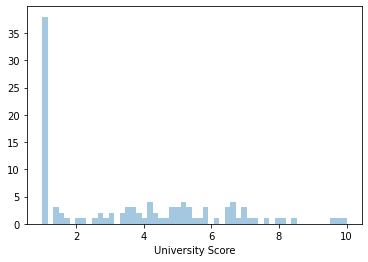

In [138]:
#@title University Score Distribution
sns.distplot(data["University Score"], bins=55, kde=False)

Frequency of city having low university score is high this can also be verified from mean value of university score.

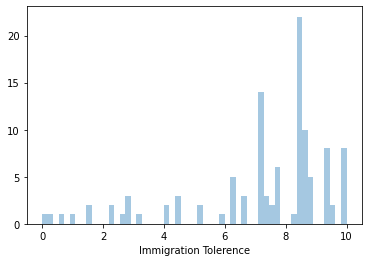

In [139]:
#@title Immigration Tolerence Distribution
sns.distplot(data["Immigration Tolerence"], bins=55, kde=False)

Large numer of city has high Immigration Tolerence.

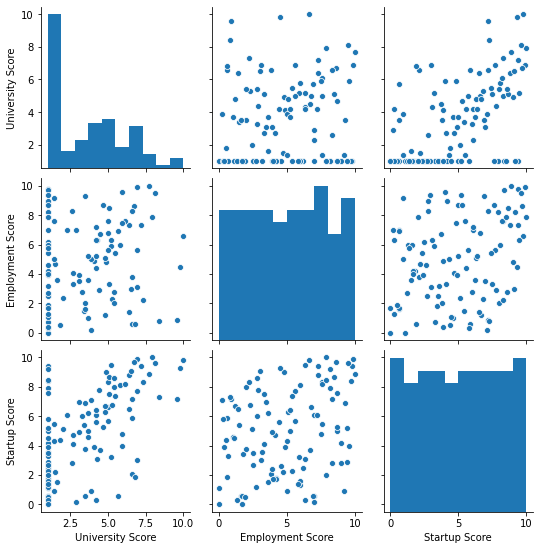

In [145]:
sns.pairplot(data[["University Score","Employment Score","Startup Score"]])

There is good correlation between unviersity score and employment and unviersity score and startup score

# #Model

In [0]:
m2 = cosine_similarity(data_cleaned.T,data_cleaned.T)

In [0]:
m2 = pd.DataFrame(m2,index=data_cleaned.columns,columns=data_cleaned.columns)

In [47]:
m2

city,Adelaide,Amsterdam,Antwerp,Athens,Auckland,Austin,Bangkok,Barcelona,Beijing,Bergen,Berlin,Bern,Birmingham,Bogotá,Bologna,Bordeaux,Boston,Brisbane,Bristol,Brno,Brugge,Brussels,Bucharest,Budapest,Buenos Aires,Canberra,Cape Town,Chicago,Christchurch,Cologne,Copenhagen,Cork,Coventry,Denver,Dublin,Edinburgh,Frankfurt,Geneva,Glasgow,Gothenburg,...,Nantes,New York City,Osaka,Oslo,Ottawa,Paris,Perth,Philadelphia,Portland,Porto,Prague,Québec City,Rio de Janeiro,Rome,Rotterdam,San Francisco,Santiago de Chile,Seattle,Seoul,Seville,Shanghai,Singapore,Stockholm,Sydney,São Paulo,Taipei,Tel Aviv,The Hague,Tokyo,Toronto,Toulouse,Utrecht,Valencia,Vancouver,Venice,Vienna,Warsaw,"Washington, D.C.",Wellington,Zurich
city,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Adelaide,1.000000,0.731064,0.911966,0.634321,0.710092,0.502751,0.465909,0.615462,0.748357,0.578150,0.854030,0.479939,0.541374,0.795413,0.569467,0.825453,0.443406,0.919959,0.525631,0.749672,0.846652,0.893976,0.442189,0.654697,0.872472,0.916713,0.459017,0.481605,0.657198,0.843808,0.788636,0.728278,0.516884,0.458211,0.743470,0.503987,0.847156,0.451780,0.534413,0.513431,...,0.837470,0.514453,0.629937,0.618953,0.918773,0.771206,0.893432,0.481365,0.480566,0.620409,0.787037,0.936400,0.872715,0.631332,0.695510,0.507272,0.871908,0.440604,0.491767,0.553824,0.760068,0.526522,0.541667,0.891777,0.855054,0.497946,0.591141,0.691561,0.634389,0.891340,0.817287,0.673338,0.578362,0.897293,0.606744,0.910048,0.491054,0.457747,0.666120,0.528386
Amsterdam,0.731064,1.000000,0.767718,0.774881,0.932543,0.904636,0.824850,0.946747,0.679664,0.836708,0.932183,0.852966,0.871384,0.694007,0.848197,0.887148,0.876426,0.757780,0.877674,0.675760,0.676457,0.798523,0.754543,0.777280,0.606213,0.656155,0.782805,0.893525,0.856870,0.903200,0.911196,0.858300,0.856127,0.865406,0.959678,0.879237,0.929865,0.852057,0.882231,0.853880,...,0.896717,0.940700,0.821636,0.925974,0.817323,0.920663,0.706451,0.881782,0.899386,0.857797,0.793048,0.776227,0.694863,0.908136,0.939841,0.933535,0.754939,0.885378,0.821216,0.834396,0.702738,0.885604,0.915924,0.784276,0.698889,0.823650,0.894265,0.928948,0.880336,0.852555,0.898639,0.933991,0.874330,0.843382,0.847411,0.815062,0.802314,0.881273,0.879384,0.930655
Antwerp,0.911966,0.767718,1.000000,0.648705,0.725810,0.596966,0.530652,0.648279,0.719785,0.652151,0.878861,0.537082,0.600513,0.794980,0.617037,0.872483,0.518427,0.864591,0.623384,0.792678,0.886845,0.955322,0.538186,0.726954,0.856443,0.845045,0.510132,0.558400,0.679534,0.888017,0.851054,0.736664,0.554723,0.557152,0.776662,0.561609,0.880006,0.513769,0.611005,0.565052,...,0.862725,0.594559,0.608208,0.678843,0.871051,0.784395,0.811398,0.555891,0.570142,0.646844,0.826963,0.900037,0.879485,0.646405,0.741351,0.591681,0.847606,0.521216,0.545416,0.573307,0.711149,0.535020,0.611330,0.829968,0.837933,0.525970,0.668619,0.714411,0.620788,0.880488,0.855479,0.691795,0.613001,0.874403,0.630658,0.889346,0.556187,0.540394,0.675511,0.587986
Athens,0.634321,0.774881,0.648705,1.000000,0.797088,0.749828,0.863458,0.865095,0.734864,0.685039,0.822678,0.731798,0.784611,0.801202,0.796352,0.828194,0.701607,0.543609,0.757316,0.833733,0.542739,0.682435,0.858454,0.880451,0.643007,0.497319,0.793218,0.759814,0.736302,0.843563,0.632828,0.758433,0.735074,0.737141,0.755103,0.733172,0.758924,0.717887,0.766895,0.784565,...,0.834980,0.768027,0.902083,0.723706,0.660682,0.729819,0.559326,0.766867,0.764417,0.892933,0.882391,0.590577,0.752692,0.900976,0.830232,0.741801,0.850226,0.732299,0.859778,0.867220,0.752895,0.825938,0.768771,0.517852,0.774585,0.874430,0.798697,0.811184,0.877713,0.615469,0.807445,0.767219,0.873296,0.570619,0.851652,0.683016,0.878041,0.718015,0.729131,0.758803
Auckland,0.710092,0.932543,0.725810,0.797088,1.000000,0.932981,0.860722,0.941189,0.712945,0.923687,0.881379,0.898857,0.951570,0.753351,0.912065,0.887430,0.911371,0.712703,0.948109,0.749437,0.693895,0.716301,0.843896,0.822612,0.582056,0.689966,0.886558,0.924114,0.960567,0.8



> Getting recommendation



In [0]:
def recommendation(city):
  score = m2[city]
  score = score.sort_values(ascending=False)
  score = pd.DataFrame(score)
  score['index'] = score.index
  print("Top 5 recommendation")
  for i in range(1,6):
    print(score.iloc[i][1]," : ",score.iloc[i][0]*100)

In [0]:
def get_similar_city():
  print("Enter your city name")
  city = input()
  recommendation(city)

In [147]:
get_similar_city()

Enter the city name
Austin
Top 5 recommendation
Denver  :  99.11596193179489
Portland  :  99.10819452450038
Seattle  :  98.57608332357985
Miami  :  98.38536526552582
Chicago  :  98.28324520273608
